# Chapter 1: Introduction

## AstroML Data Set Tools

Most of the astronomical data in this notebook and subsequent notebooks were obtained by the Sloan Digital Sky Survey (SDSS), which operated in three phases starting in 1998. 

- The camera used in this survey imaged the sky in five <a href="https://en.wikipedia.org/wiki/Photometric_system">photometric bands</a> (y,g,r,i, and z). Hence, the data released contained photometry for 357 million unique sources detected in ~12,000 $deg^2$ of sky (the full sky is equivalent to ~40,000 $deg^2$.

- The survey measure spectra for more than 600 galaxies, quasars and stars in each single observation. Wavelength: 3800-9200, spectral resolving power of R ~2000. 

- The data includes about 1.5 million spectra, with about 900,000 galaxies, 120,000 quasars and 460,000 stars. 

- Total data size is 60 TB

There is also the Two Micron All Sky Survey (2MASS) photometry for stars from the SDSS Standard Star Catalog. It survey the entire sky in near-infrared light. 

- It spans the wavelength range 1.2-2.2 $\mu$m

Finally there are other dataset that will be used like the LINEAR database features time-domain observations of thousands of variable stars; the LOGO  database: simulated data set from a gravitational wave observatory, and asteroid data file includes orbital data that come from a large variety of sources.

### SDSS imaging photometry

Details of all listed parameters retured by the above query can be found in the link below

http://skyserver.sdss.org/dr8/en/help/browser/browser.asp



In [1]:
from astroML.datasets import fetch_imaging_sample
import matplotlib.pyplot as plt

In [2]:
data = fetch_imaging_sample(data_home="dataset/")

In [3]:
data.shape,len(data[0]),len(data.dtype.names)

((330753,), 26, 26)

In [4]:
",".join(data.dtype.names)

'ra,dec,run,rExtSFD,uRaw,gRaw,rRaw,iRaw,zRaw,uErr,gErr,rErr,iErr,zErr,uRawPSF,gRawPSF,rRawPSF,iRawPSF,zRawPSF,upsfErr,gpsfErr,rpsfErr,ipsfErr,zpsfErr,type,ISOLATED'

`RA` (right ascension) and `DEC` (declination) are to the sky what longitude and latitude are to the surface of the Earth. `RA` corresponds to east/west direction (like longitude), while `Dec` measures north/south directions, like latitude.

`RA` is indeed measured in *hours, minutes, and seconds*. This is because as the Earth rotates, we see different parts of the sky throughout the night. What this means is that if an object at, say 3h 5m 38s, is overhead now, in an hour from now an object at 4h 5m 38s will be overhead, and so forth. 0 hours right ascension is by convention the right ascension of the sun on the vernal equinox, March 21. So your object is 3h 5m 38s east of the vernal equinox.

`Declination` is measured in *degrees, arcminutes, and arcseconds*. There are 60 arcmin in a degree, and 60 arcsec in an arcmin. The symbols for arcmin and arcsec are the same as for feet and inches. (Although sometimes we draw a little arc over the ' and " signs to tell them apart from the feet and inches signs.) So your object is 48 degrees, 50 arcminutes, and 2 arcseconds north of the celestial equator, which is the origin of the declination system at exactly 0 degrees. The celestial equator is the part of the sky which is directly overhead the equator of the Earth. The north star is at about +90 degrees, while the south pole would be at -90 degrees, just like latitude on Earth.

`Declination` tells you how high overhead your object eventually will rise. So your object at +48 degrees declination would pass directly over a point on the Earth at 48 degrees north latitude each night. If you were standing at, say, 38 degrees north latitude, the object would reach its greatest elevation (height) 48-38=10 degrees north on the sky from overhead.

In [5]:
data['ra'][:5],data['dec'][:5]

(array([0.358174, 0.358382, 0.357898, 0.35791 , 0.358881]),
 array([-0.508718, -0.551157, -0.570892, -0.426526, -0.505625]))

In [6]:
data['type']

array([3, 6, 3, ..., 3, 6, 3], dtype=int16)

Below we plot <strong>r vs g - r</strong> color-magnitude diagrams and the <strong>r - i vs g - r</strong> color-color diagrams for galaxies, and stars from the SDSS imaging catelog

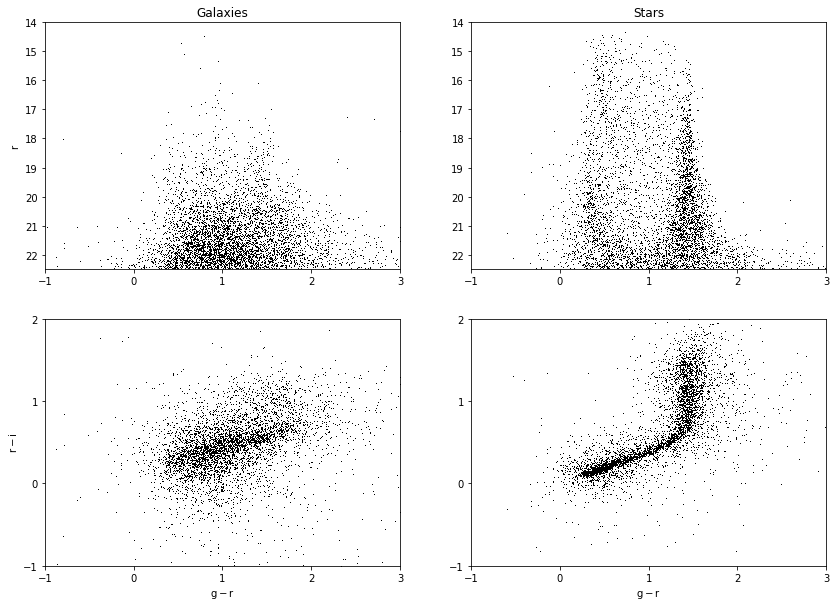

In [8]:
%matplotlib inline
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_imaging_sample

def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample(data_home="dataset/")

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies


def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none',linewidth=3, marker=',')

    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
plt.show()

## Fetching and Displaying SDSS Spectra

In [15]:
from astroML.datasets import fetch_sdss_spectrum

In [36]:
plate = 1615
mjd = 53166
fiber = 513

In [37]:
spec = fetch_sdss_spectrum(plate,mjd,fiber,data_home="dataset/spectrum")

[========================================]  182.8kb / 182.8kb   
caching to dataset/spectrum/SDSSspec/1615/spSpec-53166-1615-513.fit


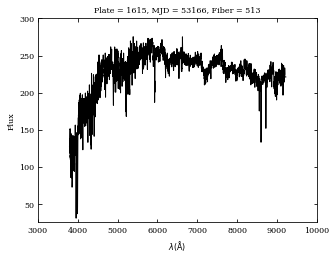

In [38]:
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(spec.wavelength(), spec.spectrum, '-k', lw=1)

ax.set_xlim(3000, 10000)
ax.set_ylim(25, 300)

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel('Flux')
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

plt.show()

Determining plate, mjd, and fiver numbers of spectra in a basic query.

In [25]:
from astroML.datasets import tools

In [26]:
target = tools.TARGET_GALAXY

In [30]:
target

64

In [40]:
plate, mjd, fib = tools.query_plate_mjd_fiber(5,primtarget=target)

In [41]:
plate,mjd,fib

(array([266, 266, 266, 266, 266]),
 array([51630, 51630, 51630, 51630, 51630]),
 array([1, 2, 4, 6, 7]))

In [44]:
for p,m,f in zip(plate,mjd,fib):
    _ = fetch_sdss_spectrum(p,m,f,data_home="dataset/")

## Galaxies with SDSS Spectroscopic Data

In [45]:
from astroML.datasets import fetch_sdss_specgals

In [46]:
data = fetch_sdss_specgals(data_home="datasets/")

[========================================]  114.85Mb / 114.85Mb   


In [47]:
data.shape

(661598,)

In [48]:
",".join(data.dtype.names)

'ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,extinction_r,petroMag_r,psfMag_r,psfMagErr_r,modelMag_u,modelMagErr_u,modelMag_g,modelMagErr_g,modelMag_r,modelMagErr_r,modelMag_i,modelMagErr_i,modelMag_z,modelMagErr_z,petroR50_r,petroR90_r,nii_6584_flux,nii_6584_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_beta_flux,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID'

In [49]:
data = data[:10000]

In [50]:
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

Text(0,0.5,'$r_{petrosian}$')

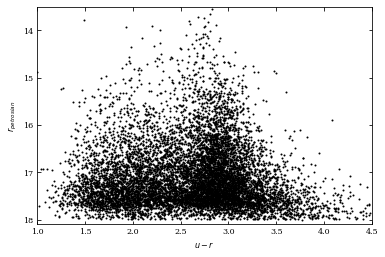

In [51]:
ax = plt.axes()
ax.scatter(u-r, rPetro, s =4, lw=0, c='k')
ax.set_xlim(1,4.5)
ax.set_ylim(18.1,13.5)
ax.set_xlabel('$u - r$')
ax.set_ylabel('$r_{petrosian}$')

## SDS DR7 Quasar Catalog

In [52]:
from astroML.datasets import fetch_dr7_quasar

In [53]:
data = fetch_dr7_quasar(data_home="datasets/")

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to datasets/
[=========================================]  12.82Mb / 12.82Mb   


In [54]:
data.shape

(105783,)

In [55]:
",".join(data.dtype.names)

'sdssID,RA,dec,redshift,mag_u,err_u,mag_g,err_g,mag_r,err_r,mag_i,err_i,mag_z,err_z,mag_J,err_J,mag_H,err_H,mag_K,err_K,specobjid'

In [56]:
data = data[:10000]

In [57]:
r = data['mag_r']
i = data['mag_i']
z = data['redshift']

Text(0,0.5,'r-i')

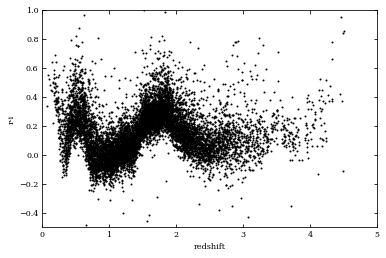

In [59]:
ax = plt.axes()
ax.scatter(z,r-i,s=4, linewidth=0, c='black')
ax.set_xlim(0,5)
ax.set_ylim(-0.5,1)
ax.set_xlabel('redshift')
ax.set_ylabel('r-i')

## SEGUE Stellar Parameters Pipeline Parameters

In [60]:
from astroML.datasets import fetch_sdss_sspp

In [61]:
data = fetch_sdss_sspp()

[========================================]  37.46Mb / 37.46Mb   


In [62]:
data.shape

(327260,)

In [63]:
",".join(data.dtype.names)

'ra,dec,Ar,upsf,uErr,gpsf,gErr,rpsf,rErr,ipsf,iErr,zpsf,zErr,pmL,pmB,pmErr,mjd,plate,fiber,SNR,FeH,FeHErr,Teff,TeffErr,logg,loggErr,alphFe,alphFeErr,radVel,radVelErr'

In [64]:
data = data[:10000]

In [65]:
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]
logg = data['logg']
Teff = data['Teff']

Text(0,0.5,'$\\mathrm{log_{10}[g / (cm/s^2)]}$')

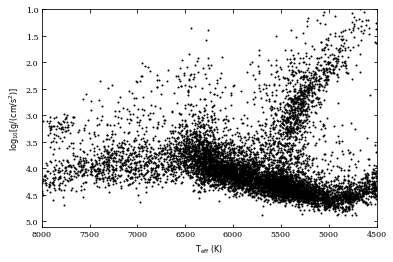

In [77]:
ax = plt.axes()
ax.scatter(Teff,logg,s=4, lw=0, c='k')
ax.set_xlim(8000,4500)
ax.set_ylim(5.1,1)
ax.set_xlabel(r'$\mathrm{T_{eff}\ (K)}$')
ax.set_ylabel(r'$\mathrm{log_{10}[g / (cm/s^2)]}$')

## SDSS Standard Star Catalog from Strip 82

In [68]:
from astroML.datasets import fetch_sdss_S82standards

In [69]:
data = fetch_sdss_S82standards()

downloading cross-matched SDSS/2MASS dataset from http://www.astro.washington.edu/users/ivezic/sdss/catalogs/stripe82calibStars_v2.6.dat.gz to /Users/jalalirs/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


In [78]:
data.shape

(10000,)

In [79]:
",".join(data.dtype.names)

'RA,DEC,RArms,DECrms,Ntot,A_r,Nobs_u,mmed_u,mmu_u,msig_u,mrms_u,mchi2_u,Nobs_g,mmed_g,mmu_g,msig_g,mrms_g,mchi2_g,Nobs_r,mmed_r,mmu_r,msig_r,mrms_r,mchi2_r,Nobs_i,mmed_i,mmu_i,msig_i,mrms_i,mchi2_i,Nobs_z,mmed_z,mmu_z,msig_z,mrms_z,mchi2_z'

In [80]:
data = data[:10000]

In [81]:
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

Text(0,0.5,'r-i')

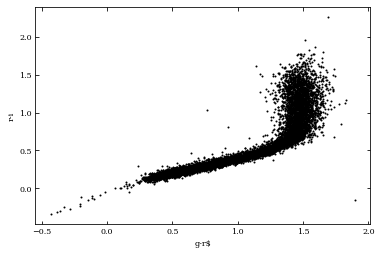

In [82]:
ax = plt.axes()
ax.scatter(g-r,r-i,s=4, lw=0, c='k')
ax.set_xlabel(r'g-r$')
ax.set_ylabel(r'r-i')